In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.api import Holt

In [4]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv',index_col=0)

In [5]:
milk.head()

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


In [6]:
y = milk['Milk']

In [7]:
y.shape

(168,)

In [8]:
y_train = y[:156]
y_test = y[156:]
y_train.shape , y_test.shape

((156,), (12,))

### Holt - Winters Additive Trend

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


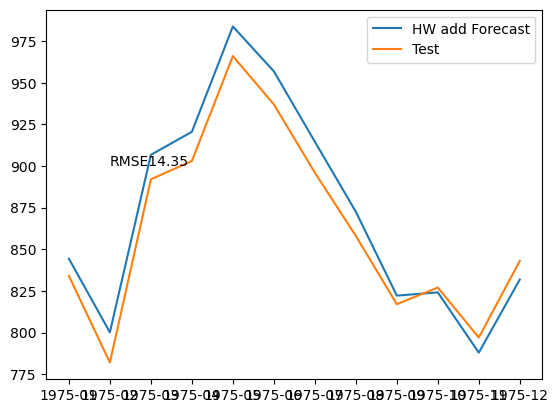

In [21]:
alpha ,beta , gamma= 0.2,0.1,0.4
hw_a = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
fit3 = hw_a.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast3=fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_a_fcast) ,2)
plt.text(1,900,"RMSE"+str(error))
plt.plot(hw_a_fcast,label='HW add Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Holt - Winters Multiplicative Trend

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


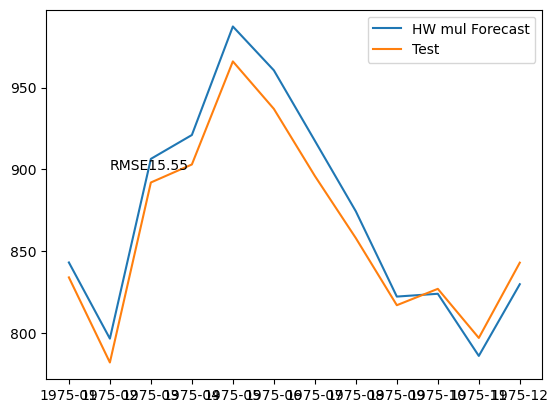

In [23]:
alpha ,beta , gamma= 0.2,0.1,0.4
hw_ml = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='mul')
fit3 = hw_ml.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast3=fit3.forecast(len(y_test))
hw_ml_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_ml_fcast) ,2)
plt.text(1,900,"RMSE"+str(error))
plt.plot(hw_ml_fcast,label='HW mul Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

#### Resampling the series yearly 

In [62]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv',index_col=0)
y = milk['Milk']
y.index = pd.DatetimeIndex(y.index).to_period('M')
type(y.index)

pandas.core.indexes.period.PeriodIndex

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_12312\2240371845.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  y_yearly = y.resample('Y').sum()


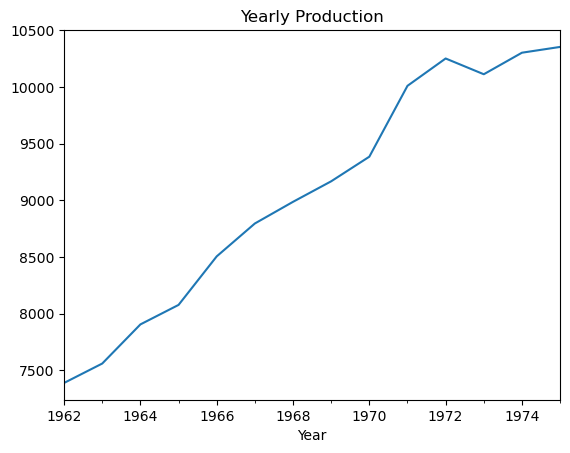

In [63]:
y_yearly = y.resample('Y').sum()
y_yearly.index.rename('Year',inplace=True)
y_yearly.plot()
plt.title('Yearly Production')
plt.show()

In [64]:
y_train = y[:-3]
y_test = y[-3:]
y_train.shape,y_test.shape

((165,), (3,))

In [65]:
holt = Holt(y_train)
alpha , beta = 0.2,0.4
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

C:\Users\DAI.STUDENTSDC\AppData\Local\Anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


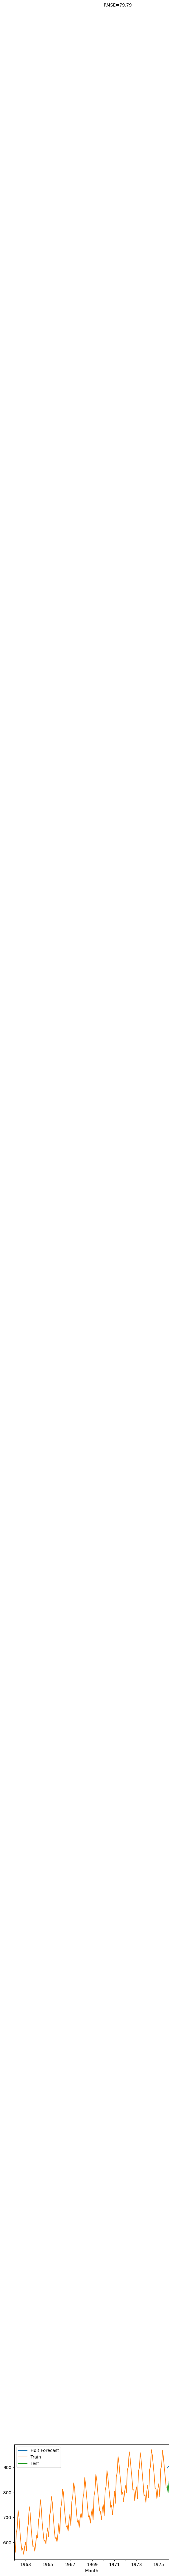

In [70]:
holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast) ,2)
holt_fcast.plot(label = 'Holt Forecast')
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.text(0.25,10700 ,"RMSE=" +str(error))
plt.legend(loc='best')
plt.show()